In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# read data, resample to monthly return
equity = pd.read_excel('data/biggestETFData.xlsx',sheet_name='US-only', index_col=0)
equity.index = pd.to_datetime(equity.index)
equity = equity.resample('W').last()
equity = equity.dropna(axis=0, how='all')

# simple return
equity_return = equity.pct_change().dropna()

In [4]:
equity_return

,SPY US Equity,VTI US Equity,QQQ US Equity,VTV US Equity,IWF US Equity,VUG US Equity,IWM US Equity,IWD US Equity,VO US Equity,VYM US Equity,...,XLY US Equity,XLP US Equity,XLU US Equity,IWP US Equity,XLI US Equity,IWS US Equity,VOE US Equity,IWV US Equity,IWO US Equity,SCHG US Equity
2010-01-10,0.028087,0.029626,0.017486,0.030157,0.019659,0.027516,0.033312,0.040244,0.038866,0.018947,...,0.020826,0.003778,-0.009671,0.026467,0.052537,0.040325,0.035835,0.028646,0.031291,0.028292
2010-01-17,-0.008117,-0.009304,-0.015038,-0.006505,-0.007476,-0.010822,-0.013019,-0.011723,-0.012203,0.000000,...,-0.013491,0.007527,0.006185,-0.012033,-0.006154,-0.011707,-0.005657,-0.009829,-0.012536,-0.011963
2010-01-24,-0.038983,-0.036348,-0.036859,-0.036014,-0.035084,-0.039681,-0.030622,-0.038807,-0.036411,-0.035640,...,-0.032021,-0.017931,-0.035264,-0.033275,-0.042312,-0.030798,-0.032236,-0.036547,-0.032747,-0.038668
2010-01-31,-0.016665,-0.018950,-0.031024,-0.011250,-0.021980,-0.022591,-0.026243,-0.016749,-0.024798,-0.013658,...,-0.003790,-0.003423,-0.009725,-0.020697,-0.016523,-0.024172,-0.019599,-0.018889,-0.027591,-0.021371
2010-02-07,-0.006798,-0.006990,0.004440,-0.010520,-0.003571,-0.004544,-0.013974,-0.008786,-0.007265,-0.008417,...,-0.004843,-0.008397,-0.020657,-0.006892,-0.006574,-0.007793,-0.008764,-0.005887,-0.012730,-0.005831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-12,0.010235,0.009333,0.019843,0.001004,0.019090,0.020870,-0.001453,0.000588,0.007808,0.000000,...,0.004053,0.004489,0.007194,0.014068,-0.001207,0.000000,0.001521,0.009855,0.008244,0.019652
2020-01-19,0.019158,0.019944,0.022662,0.014799,0.022888,0.024339,0.025350,0.016741,0.023076,0.016626,...,0.013060,0.018513,0.036646,0.020617,0.020060,0.024196,0.025319,0.019518,0.030196,0.021158
2020-01-26,-0.009580,-0.009896,-0.003044,-0.012936,-0.007152,-0.005002,-0.021766,-0.012349,-0.007300,-0.012450,...,-0.015939,-0.003604,0.023966,-0.006230,-0.010188,-0.013677,-0.010700,-0.010396,-0.019390,-0.005231
2020-02-02,-0.021413,-0.021366,-0.016300,-0.024624,-0.018281,-0.016130,-0.029385,-0.023399,-0.024532,-0.023932,...,-0.005002,-0.006448,0.009070,-0.025139,-0.029204,-0.023742,-0.024877,-0.020906,-0.025154,-0.015261


In [5]:
# nEigPort = number of eigen portfolios
nEigPort = 4

# calculate covariance matrix
eqt_ret_cov = equity_return.cov().to_numpy()

# calculate eigen values and eigen vectors
w, v = np.linalg.eig(eqt_ret_cov)
w_pct = np.round(w / sum(w) * 100,1)

# df for factor loadings
factor_loadings_df = pd.DataFrame(v[:, :nEigPort], index=equity_return.columns, columns=['PC{}({}%)'.format(i+1, w_pct[i]) for i in range(nEigPort)])

# Normalize factor loadings to sum to 1 (weightings of ETFs in portfolios)
factor_loadings_df = factor_loadings_df/factor_loadings_df.sum()
factor_loadings_df

,PC1(88.6%),PC2(2.6%),PC3(2.3%),PC4(2.0%)
SPY US Equity,0.024947,0.036037,0.083556,0.140543
VTI US Equity,0.025908,0.008331,0.001959,0.095617
QQQ US Equity,0.027489,-0.453804,0.471825,0.323618
VTV US Equity,0.024539,0.231845,-0.093868,0.059516
IWF US Equity,0.025827,-0.172448,0.223046,0.239299
VUG US Equity,0.026227,-0.194671,0.235876,0.214509
IWM US Equity,0.031359,-0.161999,-0.588624,-0.176341
IWD US Equity,0.025203,0.215456,-0.127419,-0.015023
VO US Equity,0.027559,-0.017922,-0.116341,-0.037204
VYM US Equity,0.021660,0.249497,0.066651,0.183643


<AxesSubplot:>

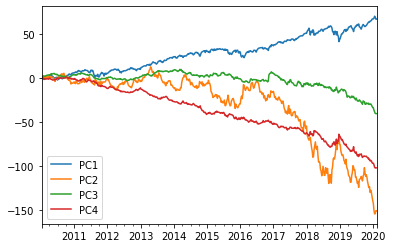

In [6]:
# eigen portfolios cumulative return by investing factor loading weightings at start
eig_port_price_df = pd.DataFrame(np.dot((1+equity_return).cumprod()-1, factor_loadings_df),index=equity_return.index, columns=['PC{}'.format(i+1) for i in range(nEigPort)])

# change starting value to 1
eig_port_price_df = eig_port_price_df / eig_port_price_df.iloc[0,:]

eig_port_price_df.plot()

In [14]:
# Eigen portfolios are indeed uncorrelated
eig_port_price_df.pct_change().corr()

,PC1,PC2,PC3,PC4
PC1,1.000000,-0.007261,-0.000657,-0.005626
PC2,-0.007261,1.000000,0.002764,-0.004685
PC3,-0.000657,0.002764,1.000000,-0.003045
PC4,-0.005626,-0.004685,-0.003045,1.000000
